Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.004 seconds.
Prefix dict has been built succesfully.


LR : 0.862286 (0.080261)
SVM : 0.000000 (0.000000)
CART : 0.802381 (0.089292)
MNB : 0.383333 (0.265093)
KNN : 0.814571 (0.088927)
RF : 0.609143 (0.200680)
AB : 0.569714 (0.271657)


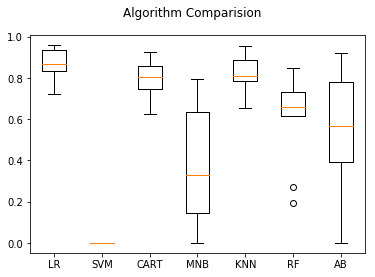

In [1]:
import pandas as pd
import os
#读入训练集的文件，形成矩阵
def list_all_files(rootdir):
    _files = []
    list = os.listdir(rootdir) #列出文件夹下所有的目录与文件
    for i in range(0,len(list)):
        path = os.path.join(rootdir,list[i])
        if os.path.isdir(path):
            _files.extend(PdfToTxt.list_all_files(path))
        if os.path.isfile(path):
            _files.append(list[i])
    return _files

def gettxt_list(rootdir):
    all_list = list_all_files(rootdir)   
    txt_list=[]
    for onelist in all_list:
        if onelist.find('txt') != -1:
            txt_list.append(onelist[0:-4])   
        #print(txt_list)
    return txt_list

def readtxt(filename,rootdir):
    #读取一个txt文件，内容保存在str中
    f=open(rootdir+'/'+filename+'.txt','r',encoding='ANSI',errors='ignore')
    str = ''
    for line in f.readlines():
        a = line.strip('\n')
        str = str + a
        #print(str)
    return str

def getAlldata(rootdir):
    filesdata = []
    txt_lists = gettxt_list(rootdir)
        #print(txt_lists)
    for i in range(len(txt_lists)):
        filename = txt_lists[i]
        file_content = readtxt(filename,rootdir)
        listi = [filename,file_content]
        filesdata.append(listi)
        #print(data)
    return filesdata

def new_DataFrame(rootdir,catagory): 
    filesdata= getAlldata(rootdir)
    df_files = pd.DataFrame(data=filesdata,columns = ['filename','content'])
    df_files['catagory'] = catagory
    return df_files

rootdir1 = r'C:\EdmsData\data2\train_corpus\C3-Art'
xunlian_files = new_DataFrame(rootdir1,'C3-Art')

rootdir2 = r'C:\EdmsData\data2\train_corpus\C19-Computer'
xunlian_files2 = new_DataFrame(rootdir2,'C19-Computer')


rootdir3 = r'C:\EdmsData\data2\train_corpus\C31-Enviornment'
xunlian_files3 = new_DataFrame(rootdir3,'C31-Enviornment')

rootdir4 = r'C:\EdmsData\data2\train_corpus\C32-Agriculture'
xunlian_files4 = new_DataFrame(rootdir4,'C32-Agriculture')

rootdir5 = r'C:\EdmsData\data2\train_corpus\C34-Economy'
xunlian_files5 = new_DataFrame(rootdir5,'C34-Economy')

rootdir6 = r'C:\EdmsData\data2\train_corpus\C38-Politics'
xunlian_files6 = new_DataFrame(rootdir6,'C38-Politics')

rootdir7 = r'C:\EdmsData\data2\train_corpus\C39-Sports'
xunlian_files7 = new_DataFrame(rootdir7,'C39-Sports')

xunlian_files = xunlian_files.append(xunlian_files2,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files3,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files4,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files5,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files6,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files7,ignore_index=True)

#xunlian_files #训练集
#print(xunlian_files.head(9800))

#----------------------------------形成训练集的数据框---------------------------

#----------------------------------形成测试集的数据框---------------------------


from sklearn.externals import joblib
#分词
import jieba

stoplist = list(pd.read_csv('C:/TMdata/stopwords.txt',names=['w'],sep='aaa',encoding='UTF-8',engine='python').w)
cuttxt = lambda x : ' '.join([w for w in jieba.cut(x) if w not in stoplist and len(w) >1])

#cuttxt = lambda x : ' '.join(jieba.lcut(x))
xunlian_files['cleantxt'] = xunlian_files.content.apply(cuttxt)


#词频矩阵
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer() 
xunlian_files_catagory = []
for i in range(len(xunlian_files)):
    xunlian_files_catagory.append(xunlian_files.catagory[i])


x_train_wordmtx = countvec.fit_transform(xunlian_files.cleantxt)
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()  
x_train_tfidf = transformer.fit_transform(x_train_wordmtx)

#print(x_train.shape)

import numpy as np
y_train0 = np.array(xunlian_files_catagory)


# 作用：将数据集划分为 训练集和测试集
from sklearn.model_selection import train_test_split
#raw12ana.chap 要预测的变量值
x_train, x_test, y_train, y_test = train_test_split(x_train_tfidf, y_train0, test_size = 0.3, random_state = 7)


#----------------------------------拟合模型--------------------------

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

#设置评估算法的基准
num_folds = 10
seed = 7
scoring = 'accuracy'
#生成算法模型
models = {}
models['LR'] = LogisticRegression()
models['SVM'] = SVC()
models['CART'] =DecisionTreeClassifier()
models['MNB'] = MultinomialNB()
models['KNN'] = KNeighborsClassifier()
models['RF'] = RandomForestClassifier()
models['AB'] = AdaBoostClassifier()
from sklearn.metrics import classification_report
results = []
for key in models:  
    kfold = KFold(n_splits = num_folds,random_state = seed)
    cv_results = cross_val_score(models[key],x_train_tfidf,y_train0,cv = kfold,scoring = scoring)
    results.append(cv_results)
    print('%s : %f (%f)' %(key,cv_results.mean(),cv_results.std()))
    
#箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()